In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow import keras

2023-02-14 08:35:31.507795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_test = ", X_test.shape)
print("y_test = ", y_test.shape)

X_train =  (60000, 28, 28)
y_train =  (60000,)
X_test =  (10000, 28, 28)
y_test =  (10000,)


/var/folders/pd/8xdtkz814m5d49w2snrl4c5r0000gn/T/ipykernel_3207/2139875888.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


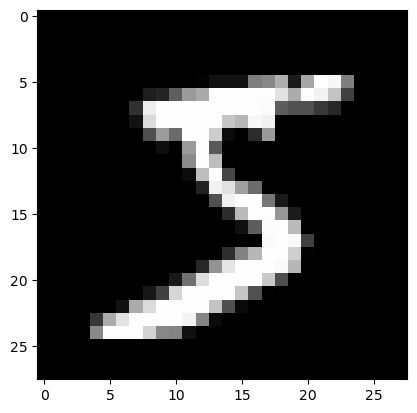

In [5]:
fig, axs = plt.subplots()
axs.imshow(X_train[0], cmap=plt.get_cmap('gray'))
fig.show()

In [6]:
# Let's make our own split
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
print(X.shape)
print(y.shape)



(70000, 28, 28)
(70000,)


In [7]:
# Take a sample (10%)
fraction = 10
X_sample, _, y_sample, _ = train_test_split(
    X, y, shuffle=True, train_size=fraction / 100.0, stratify=y
)
print(X_sample.shape)
print(y_sample.shape)
unique, counts = np.unique(y_sample, return_counts=True)
zipped = list(zip(unique, counts))
y_sample_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_sample_value_counts.set_index('label', inplace=True)
print(y_sample_value_counts)

(7000, 28, 28)
(7000,)
       counts
label        
0         690
1         788
2         699
3         714
4         682
5         631
6         688
7         729
8         683
9         696


In [8]:
split_list = [0.7, 0.2, 0.1]

In [9]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_sample,
        y_sample,
        shuffle=True,
        test_size=split_list[2],
        stratify=y_sample,
    )
assert np.all(np.unique(y_trainval)==np.unique(y_test))


val_size = split_list[1] / (split_list[0] + split_list[1])
print("val_size = ", val_size)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=val_size,
    stratify=y_trainval,
)
assert np.all(np.unique(y_train)==np.unique(y_val))

print("training examples: ", len(X_train))
print("validation examples: ", len(X_val))
print("test examples: ", len(X_test))

val_size =  0.22222222222222227
training examples:  4899
validation examples:  1401
test examples:  700


       counts
label        
0         483
1         551
2         489
3         500
4         478
5         442
6         481
7         510
8         478
9         487


<AxesSubplot: xlabel='label'>

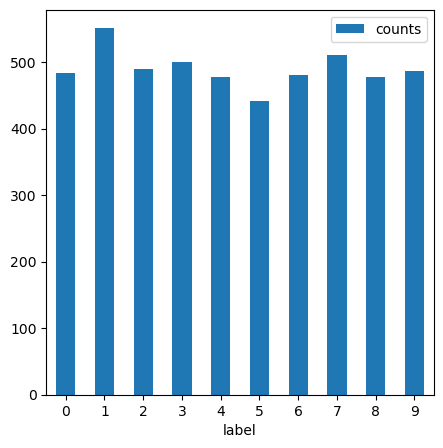

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
zipped = list(zip(unique, counts))
y_train_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_train_value_counts.set_index('label', inplace=True)
print(y_train_value_counts)
y_train_value_counts.plot(
    kind="bar",
    rot=0, 
    figsize=(5,5)
)

       counts
label        
0         138
1         158
2         140
3         143
4         136
5         126
6         138
7         146
8         137
9         139


<AxesSubplot: xlabel='label'>

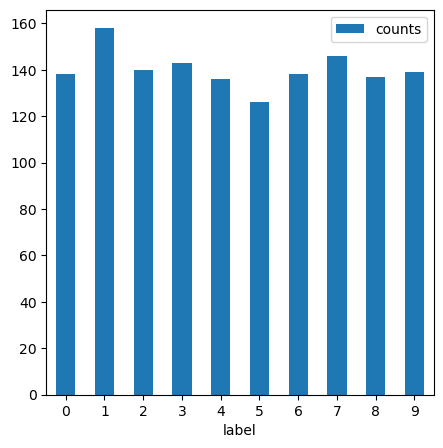

In [11]:
unique, counts = np.unique(y_val, return_counts=True)
zipped = list(zip(unique, counts))
y_val_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_val_value_counts.set_index('label', inplace=True)
print(y_val_value_counts)
y_val_value_counts.plot(
    kind="bar",
    rot=0, 
    figsize=(5,5)
)

       counts
label        
0          69
1          79
2          70
3          71
4          68
5          63
6          69
7          73
8          68
9          70


<AxesSubplot: xlabel='label'>

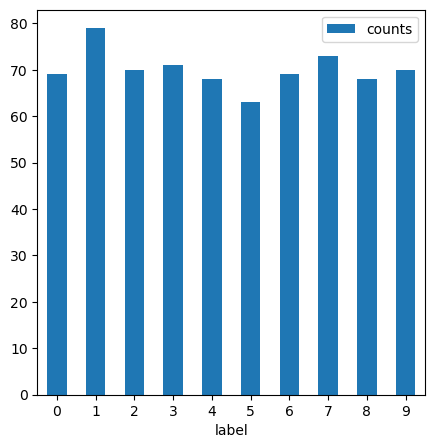

In [12]:
unique, counts = np.unique(y_test, return_counts=True)
zipped = list(zip(unique, counts))
y_test_value_counts = pd.DataFrame(zipped, columns=["label", "counts"])
y_test_value_counts.set_index('label', inplace=True)
print(y_test_value_counts)
y_test_value_counts.plot(
    kind="bar",
    rot=0, 
    figsize=(5,5)
)

In [13]:
# We can multiply by a factor corresponding to the split fraction to compare them
train_norm = y_train_value_counts["counts"]*100/70
val_norm = y_val_value_counts["counts"]*100/20
test_norm = y_test_value_counts["counts"]*100/10
norm_df = pd.concat([train_norm, val_norm, test_norm], axis=1)
norm_df.columns.values[0]="train"
norm_df.columns.values[1]="val"
norm_df.columns.values[2]="test"
norm_df


,train,val,test
label,,,
0,690.000000,690.0,690.0
1,787.142857,790.0,790.0
2,698.571429,700.0,700.0
3,714.285714,715.0,710.0
4,682.857143,680.0,680.0
5,631.428571,630.0,630.0
6,687.142857,690.0,690.0
7,728.571429,730.0,730.0
8,682.857143,685.0,680.0


<AxesSubplot: title={'center': 'Normalized distribution of labels for the 3 datasets'}, xlabel='label', ylabel='Normalized arbitrary counts'>

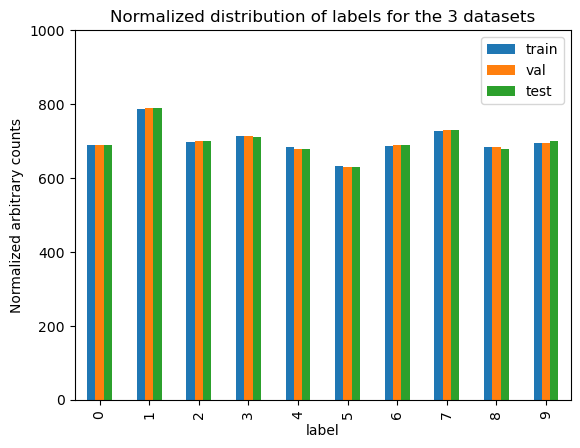

In [14]:
norm_df.plot( 
    kind="bar", 
    stacked=False, 
    title="Normalized distribution of labels for the 3 datasets",
    ylabel="Normalized arbitrary counts",
    ylim=(0,1000),
)